In [1]:
import numpy as np 
import pandas as pd 
from skimage.data import imread
import matplotlib.pyplot as plt
import os

In [2]:
def rle_decode(mask_rle, shape=(768, 768)): # change shape as per image shape
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  

In [3]:
img = imread('data/image1.jpg')
# The RLE encoding for above image is-
img_masks=['371843 2 372609 5 373375 7 374142 9 374910 9 375679 9 376447 9 377216 9 377984 9 378753 9 379521 9 380290 9 381058 9 381827 9 382595 8 383364 5 384132 4 384901 1',
 '494259 1 495025 4 495792 5 496558 8 497325 10 498094 9 498862 10 499631 9 500400 9 501168 10 501937 9 502705 10 503474 10 504243 9 505011 10 505780 8 506549 5 507317 4 508086 1',
 '420090 2 420854 6 421618 11 422384 13 423152 13 423921 12 424689 13 425457 13 426225 13 426994 12 427762 13 428530 13 429299 12 430067 13 430835 13 431603 13 432372 12 433140 13 433908 13 434676 13 435445 12 436213 12 436981 12 437750 11 438518 11 439286 11 440054 11 440823 10 441591 10 442359 10 443128 9 443896 9 444664 9 445432 9 446201 8 446969 8 447737 8 448505 8 449274 7 450042 7 450810 7 451579 6 452347 6 453115 6 453883 6 454652 4 455420 1',
 '151875 2 152643 4 153410 8 154178 11 154945 14 155713 16 156483 14 157253 11 158024 8 158795 4 159565 2',
 '523484 2 524250 4 525016 7 525782 9 526548 12 527314 14 528080 17 528846 19 529612 22 530378 24 531144 27 531911 28 532680 28 533448 28 534217 28 534985 28 535754 28 536522 28 537291 28 538059 28 538828 28 539596 28 540365 28 541133 28 541902 28 542670 28 543439 28 544207 28 544976 28 545744 28 546513 28 547281 28 548050 28 548818 28 549587 28 550355 28 551124 28 551892 28 552661 28 553429 28 554198 28 554967 27 555735 28 556504 27 557272 28 558041 27 558809 28 559578 27 560346 28 561115 27 561883 28 562652 27 563420 28 564189 27 564957 28 565726 27 566494 28 567263 27 568031 28 568800 26 569568 24 570337 21 571105 19 571874 16 572642 14 573411 11 574179 9 574948 6 575716 4 576485 1']
print ("Number of masks in the image are {}".format(len(img_masks)))

Number of masks in the image are 5


In [4]:
print ('Image shape is ',img.shape)

Image shape is  (768, 768, 3)


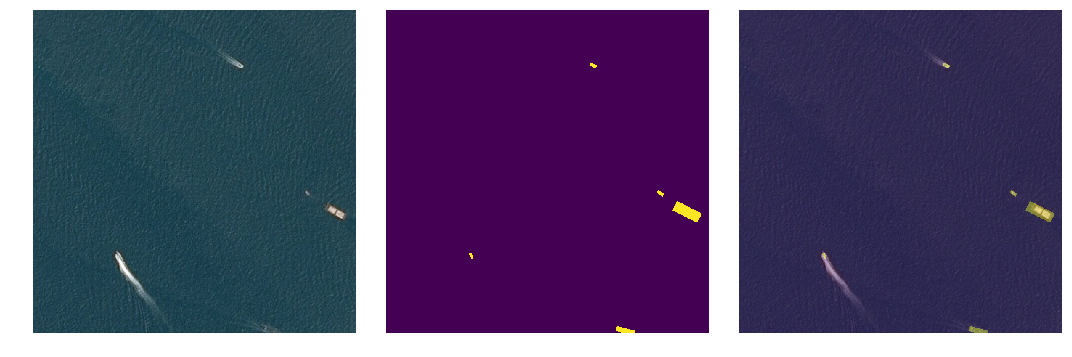

In [7]:
all_masks = np.zeros((img.shape[0], img.shape[1]))
for mask in img_masks:
    all_masks += rle_decode(mask)
fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()
